# **Supervised Learning Project**
## on:  Medical Costs Dataset

##About the dataset:

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

The dataset is available [here](https://github.com/stedy/Machine-Learning-with-R-datasets) in Github.

### Importing required Libraries and loading up the data.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_raw.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_raw.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

By looking into the various aspects of the datasset, we can state our findings and solutions:

* There are 1338 rows and 7 columns
* There are no null values.
* There are no duplicated rows
* columns 'sex, smoker, region' are of 'object' dtype
* columns 'age, bmi, children, charges' are of 'numerical' dtype

We can one-hot-encode the object type columns to be numerically compatible and  to a Tensor.

In [ ]:
df_encoded = pd.get_dummies(df_raw, dtype = float)

In [ ]:
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Now that all the columns are in numerical format, we can start creating our training and testing dataset.

## Creating **Train** - **Test** set:

In [ ]:
X = df_encoded.drop('charges', axis = 1)
y = df_encoded['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

As we have prepared the data of somewhat stage....
we can go for creating the model.

## Creating the Model

### Model 1

In [ ]:
tf.random.set_seed(42)
# Create the model:
ins_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

# Compile the model
ins_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit the data
history_1 = ins_model_1.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
ins_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6956.5054 - mae: 6956.5054


[6956.50537109375, 6956.50537109375]

In [ ]:
def eval_metrics(y_test_val, y_pred_val):
  '''
  This function returns the MAE & MSE score
  by comparing y_test and y_preds value
  '''
  mae = tf.keras.metrics.MAE(tf.squeeze(y_test_val), tf.squeeze(y_pred_val))
  mse = tf.keras.metrics.MSE(tf.squeeze(y_test_val), tf.squeeze(y_pred_val))
  return mae, mse

In [ ]:
y_preds_1 = ins_model_1.predict([X_test])

9/9 [==============================] - 0s 2ms/step


In [ ]:
mae_1, mse_1 = eval_metrics(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6956.5054>,
 <tf.Tensor: shape=(), dtype=float32, numpy=112884730.0>)

We can see that the predictions are way off in comparision to the testing data.
It concludes that the model iss highly inaccurate and needs further tweaking.

### Model 2

In [ ]:
tf.random.set_seed(42)

# Create the model:
ins_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compiling the model:
ins_model_2.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(lr = 0.1),
  metrics = ['mae']
)

# Fitting the data
history_2 = ins_model_2.fit(X_train, y_train, epochs = 200, verbose = 0)

In [ ]:
ins_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3502.8735 - mae: 3502.8735


[3502.87353515625, 3502.87353515625]

In [ ]:
y_preds_2 = ins_model_2.predict([X_test])

mae_2, mse_2 = eval_metrics(y_test,y_preds_2)
mae_2, mse_2

9/9 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3502.8738>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43174820.0>)

Text(0.5, 0, 'Epochs')

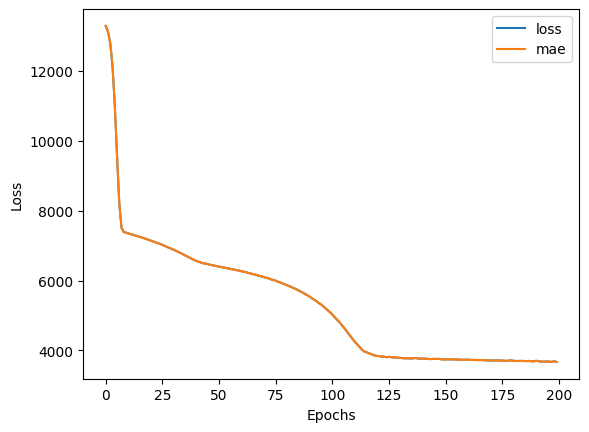

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

As we saw that the learning is diminished after reaching a certain point of epochs = 125-150, and still has significant loss factor, we can focus on normalizing and standardinzing our input data.


### Normalizing and Standardizing

Taking the dataset once again to normalize and create our train-test sets again &
Creating our column transformer

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Creating a column transformer
tr1 = make_column_transformer(
  (MinMaxScaler(),['age', 'bmi', 'children']),
  (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

# Creating X & y
X = df_raw.drop('charges', axis = 1)
y = df_raw['charges']

# Building our training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Fitting the column transformer to our training data
tr1.fit(X_train)

# Transforming the scaled training data to a normal distribution
X_train_normal = tr1.transform(X_train)
X_test_normal = tr1.transform(X_test)

In [ ]:
X_train_normal.shape

(1070, 11)

As we can see our data is normalized and one hot encoded, we can start building another model and train it.

In [ ]:
tf.random.set_seed(42)

# Create the model:
ins_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compiling the model
ins_model_3.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
  metrics = ["mae"]
)

#Fitting the model with data
history_3 = ins_model_3.fit(X_train_normal, y_train, epochs = 200, verbose = 0)

In [ ]:
ins_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3209.6172 - mae: 3209.6172


[3209.6171875, 3209.6171875]

In [ ]:
y_preds_3 = ins_model_3.predict([X_test_normal])

mae_3, mse_3 = eval_metrics(y_test,y_preds_3)
mae_3, mse_3

9/9 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3209.6167>,
 <tf.Tensor: shape=(), dtype=float32, numpy=44100380.0>)

Text(0.5, 0, 'Epochs')

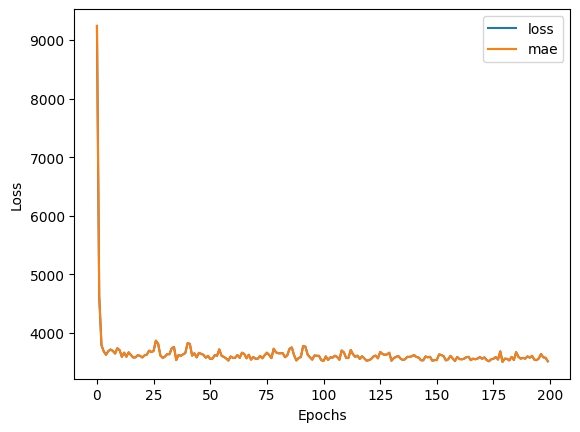

In [ ]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

### Model 4

In [ ]:
tf.random.set_seed(42)

# Create the model:
ins_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compiling the model
ins_model_4.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
  metrics = ["mae"]
)

#Fitting the model with data
history_4 = ins_model_4.fit(X_train_normal, y_train, epochs = 200, verbose = 0)


In [ ]:
y_preds_4 = ins_model_4.predict([X_test_normal])

mae_4, mse_4 = eval_metrics(y_test,y_preds_4)
mae_4, mse_4

9/9 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3273.2913>,
 <tf.Tensor: shape=(), dtype=float32, numpy=39520180.0>)

Text(0.5, 0, 'Epochs')

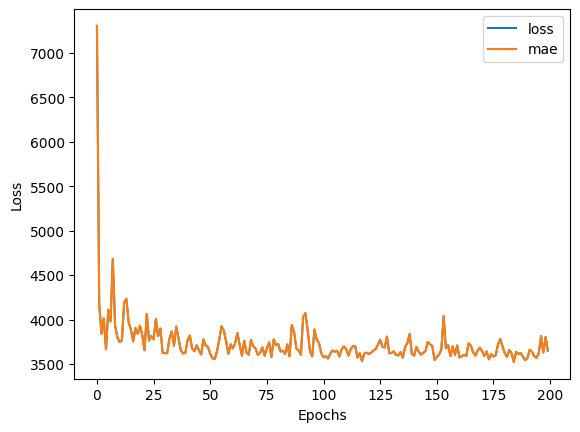

In [ ]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

Model Summary:

Out of the 4 models that we experimented on, we can see that the 3rd model (ins_model_3) seems to be the most accurate.

This project waaas just a trial regarding how neural networks in Tensorflow works and its implementation in lineaar regression.

We could definitely be getting more accurate results if we could have used LineaarRegrerssor model from SciKitLearn and may be we can get better results from Tensorflow by tweaking its levers further.

PS. if you're looking for visualizations fro this database, you can get a lot of them from Github.

Thanks